# Python script from Felix Scheibe, for his MPMD Master's Thesis

This is the Python script from Felix Scheibe, used in his Master's Thesis in Project Management and Data Science (MPMD) at Hochschule für Technik und Wirtschaft Berlin.

Title: The Rise of Python and Qlik Sense in Data Science: Prospects and Limitations - Two Case Studies from the Aviation Industry

First supervisor: Prof. Dr. Tilo Wendler, HTW Berlin
Second supervisor: Prof. Bertil Haack, TH Wildau

# 3 Empirical evaluation: Two case studies from the aviation industry

## 3.2 Forecasting passengers of Munich airport

#### Data understanding

All chapters of this script correspond to the related chapters of the Master's thesis. The aim is to compare functionalities of Qlik Sense to those of Python. Every single step is explained by comments.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

In [2]:
# Read Munich airport passenger time series
Munich = pd.read_excel('PassengersMUC.xlsx', header=0, index_col=0, parse_dates=True, squeeze=True)

In [3]:
# preview first rows
Munich.head()

Date
2015-01-01    2698572
2015-02-01    2710367
2015-03-01    3246875
2015-04-01    3326585
2015-05-01    3674593
Name: Passengers, dtype: int64

In [4]:
# Check dimensions (rows, columns) of  dataset
print("passenger dimensions: {}".format(Munich.shape))

passenger dimensions: (57,)


In [5]:
# Plot time series in line chart
from matplotlib import pyplot
Munich.plot()
pyplot.show()


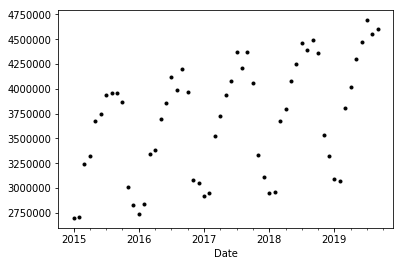

In [6]:
# Plot time series in scatter chart
from matplotlib import pyplot
Munich.plot(style='k.')
pyplot.show()


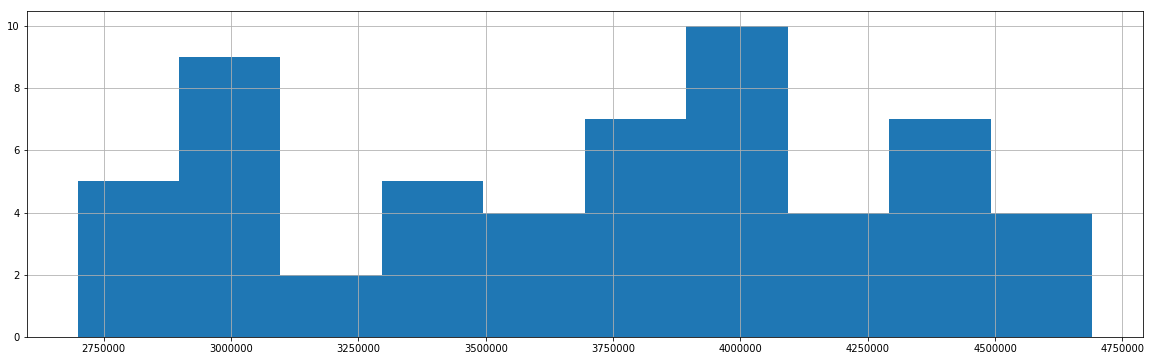

In [7]:
# Plot Histogram
from matplotlib import pyplot
Munich.hist(figsize=(20, 6))
pyplot.show()

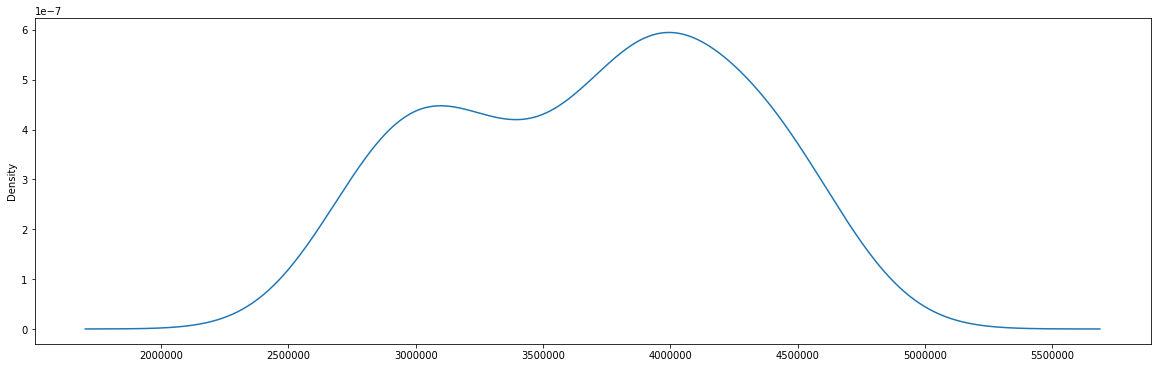

In [8]:
# Plot density chart
from matplotlib import pyplot
Munich.plot(kind='kde', figsize=(20, 6))
pyplot.show()

Text(0,0.5,'Passengers')

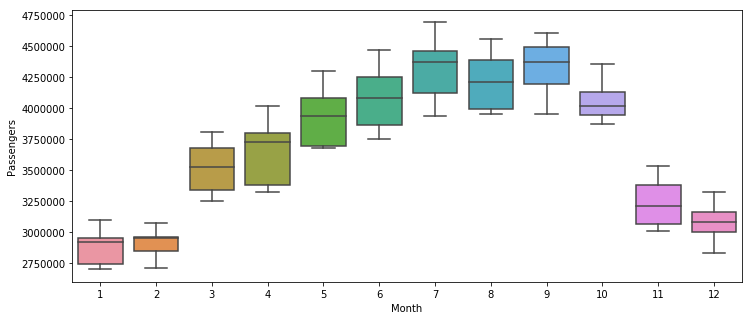

In [9]:
# Boxplots by month over time series 
import seaborn
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,5))
seaborn.boxplot(Munich.index.month, Munich)

ax.set_xlabel("Month")
ax.set_ylabel("Passengers")

#### Data preparation

In [10]:
#Creating training and test dataset (57 months in total)

train=Munich[0:47] 
test=Munich[47:]

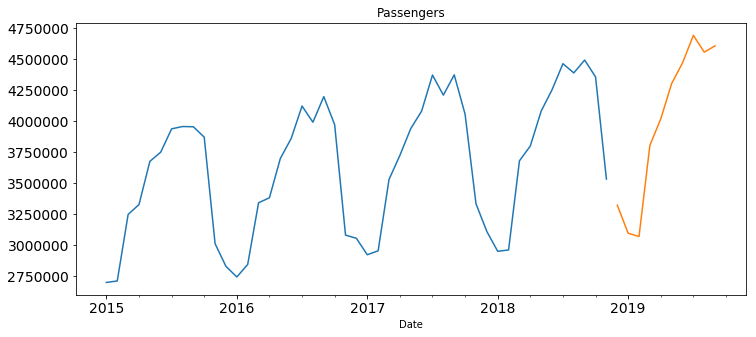

In [11]:
#Plotting train and test data
train.plot(figsize=(12,5), title= 'Passengers', fontsize=14)
test.plot(figsize=(12,5), title= 'Passengers', fontsize=14)
plt.show()

#### Modelling

C:\Users\Felix\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


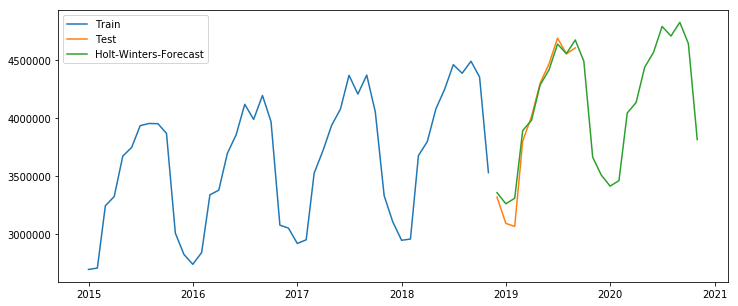

In [12]:
# Forecasting 24 month using the Holt-Winters model, additive method
from statsmodels.tsa.api import ExponentialSmoothing

fit1 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).fit()
pred = fit1.forecast(24)

plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters-Forecast')
plt.legend(loc='best')
plt.show()

#### Model evaluation

In [13]:
# Calculating RMSE (length of test and prediction period need to be equal)
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse1 = sqrt(mean_squared_error(test, pred[0:10]))
print(rmse1)



104049.664138137


C:\Users\Felix\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


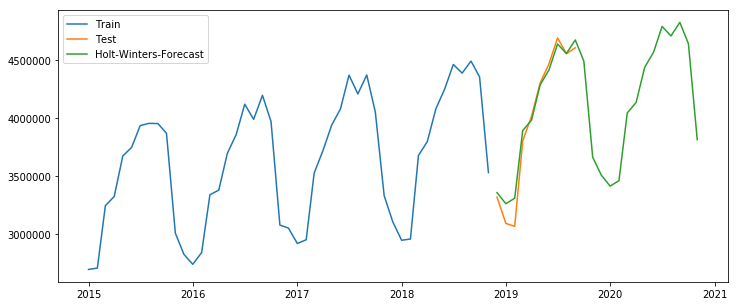

In [21]:
# Additive method, with damping
from statsmodels.tsa.api import ExponentialSmoothing

fit2 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12, damped=True).fit()
pred = fit2.forecast(24)

plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters-Forecast')
plt.legend(loc='best')
plt.show()

In [22]:
# Calculating RMSE (length of test and prediction period need to be equal)

rmse2 = sqrt(mean_squared_error(test, pred[0:10]))
print(rmse2)

104018.58513589679


C:\Users\Felix\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


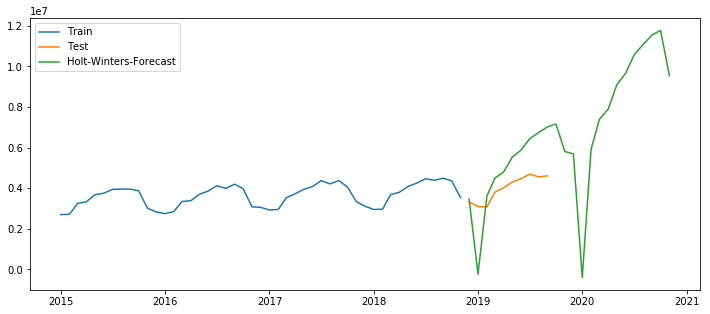

In [23]:
# Multiplicative method, no damping
fit3 = ExponentialSmoothing(train, trend="mul", seasonal="mul", seasonal_periods=12).fit()
pred = fit3.forecast(24)

plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters-Forecast')
plt.legend(loc='best')
plt.show()

In [24]:
# Calculating RMSE (length of test and prediction period need to be equal)

rmse3 = sqrt(mean_squared_error(test, pred[0:10]))
print(rmse3)

1722191.2557560124


C:\Users\Felix\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


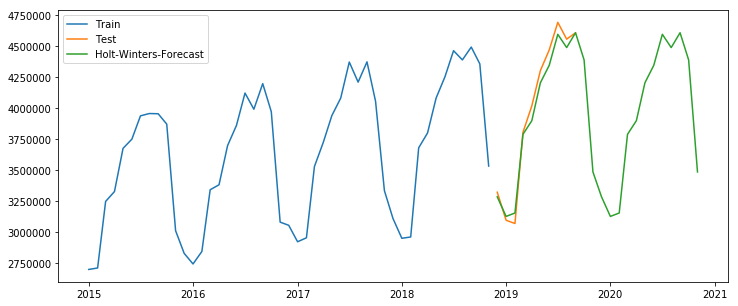

In [25]:
# Multiplicative method, with damping
fit4 = ExponentialSmoothing(train, trend="mul", seasonal="mul", seasonal_periods=12, damped=True).fit()
pred = fit4.forecast(24)

plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters-Forecast')
plt.legend(loc='best')
plt.show()

In [26]:
# Calculating RMSE (length of test and prediction period need to be equal)

rmse4 = sqrt(mean_squared_error(test, pred[0:10]))
print(rmse4)

79349.17228195477


C:\Users\Felix\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Felix\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


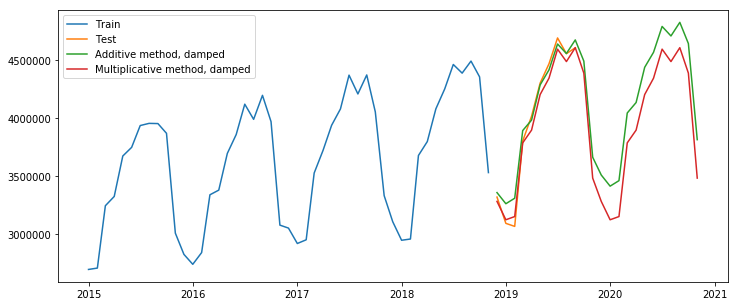

In [27]:
# Additive vs. Multiplicative method, both with damping
from statsmodels.tsa.api import ExponentialSmoothing

fit5 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12, damped=True).fit()
pred1 = fit5.forecast(24)

fit6 = ExponentialSmoothing(train, trend="mul", seasonal="mul", seasonal_periods=12, damped=True).fit()
pred2 = fit6.forecast(24)

plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred1, label='Additive method, damped')
plt.plot(pred.index, pred2, label='Multiplicative method, damped')
plt.legend(loc='best')
plt.show()
